# Taller de Investigación
## Trabajando con la simulación semianalitica mini

La idea inicial, lectura de archivos, calculo de distrancia entre halos e identificación de las caracteristicas del ambiente. 

In [50]:
import numpy as np
import h5py                                      #que pasa con hdf5? 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Lectura de archivos
Primero la lectura de datos: A continuación solo llama columnas de ID, X, Y, Z (trabajo con la pato)

In [51]:
datos = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[0,3,5,6,7], names=True)
#datos

Clase de lectura de archivos, donde se requieren las columnas iniciales de interes de los archis, se lee el tipo hdf5 y se guarda la información asociada a un halo en particular. 

In [52]:
class read_file: 
    
    def __init__(self, path, file, columns=None):
        if columns is not None:
            self.cols = columns
        else:
            self.cols     = [0, 1, 2, 3, 5, 6, 7]                #ID, hosthalo, substruc, masa y posiciones xyz
            
        self.path = path; self.file = file; self.read()
        
    def read(self):
        if self.file == "*.hdf5":
            print("No se ha hecho esta parte")
        else:
            data = np.genfromtxt(str(self.path+self.file), usecols = self.cols, names=True)   
            self.data = np.array([list(row) for row in data])#para poder hacer slicing
            
    def halo_info(self, index, info=False): 
        self.hinfo = self.data[index]
        return(self.hinfo)

Ejemplo de lectura de archivos

In [53]:
sussing_125 = read_file("DATA/", "sussing_125.z0.000.AHF_halos")

Ahora se realizan calculos de distancia y velocidades. 

In [54]:
class kinetic:                                   #cinematica entre dos halos
    
    def __init__(self, halo1, halo2):            #halo1 y halo22 son objetos de read_file (halo_info)  
        self.halo1 = halo1; self.halo2 = halo2     

    def distance(self): 
        posA = self.halo1[4:]; posB = self.halo2[4:]
        return(np.linalg.norm(posA-posB))
    
    #def velocity(self, , halo2): 
        #return(np.linalg.norm(halo1-halo2))
    
#preguntal al profe sobre los cambios que sugirió.

In [55]:
distancia = kinetic(sussing_125.halo_info(15), sussing_125.halo_info(20))#.distance()
#distancia.distance()

### Tarea I: gráfica de halos vs masa
Primero, vamos como es para el ultimo de l snapshots de la sumulación: 

In [56]:
datos = sussing_125.data[sussing_125.data[:,1] == 0] 

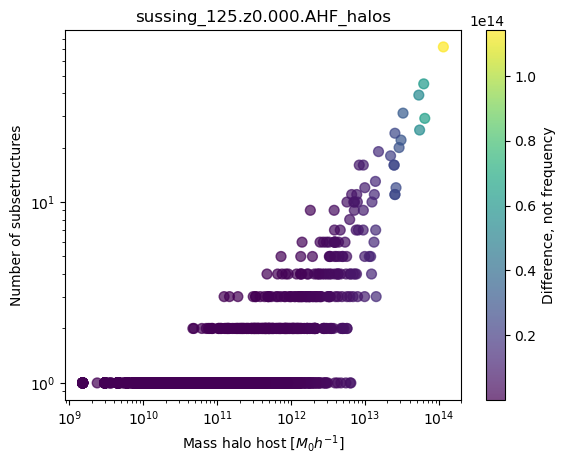

In [57]:
dis = np.sqrt(datos[:,3]**2 + datos[:,2]**2)

fig, ax = plt.subplots()
plt.xscale('log'); plt.yscale('log')
ax.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax.set_ylabel("Number of subsetructures")
ax.set_title('sussing_125.z0.000.AHF_halos')
scatter = ax.scatter(datos[:,3], datos[:,2], c=dis, s=50, alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Difference, not frequency')

plt.show()

Teniendo en cuenta todos los archivos y snapshots en la simulación. 

In [58]:
import glob #La idea es leer todos los datos de la mini
archivos = glob.glob('DATA/'+'sussing*.z0.*_halos*')
archivos = [archivo.replace('DATA/', '') for archivo in archivos]

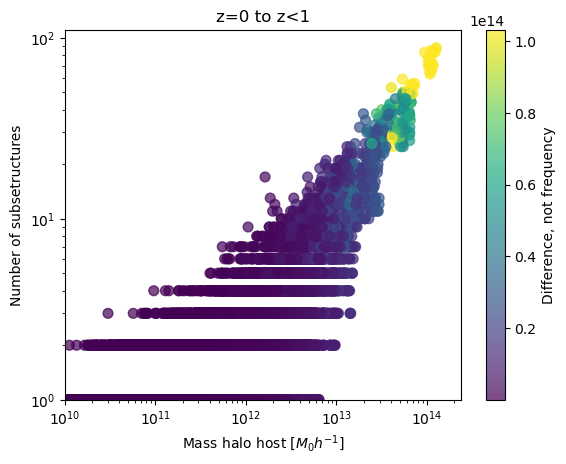

In [59]:
fig, ax1 = plt.subplots()

column_width = 1e1

for i in range(len(archivos)):
    j = read_file('DATA/', archivos[i])
    j = j.data[j.data[:,1] == 0] 

    dist = np.sqrt(j[:,3]**2 + j[:,2]**2)
    scatter = ax1.scatter(j[:,3], j[:,2], c=dist, cmap='viridis', s=50, marker='o', alpha=0.7)

ax1.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax1.set_ylabel("Number of subsetructures")
ax1.set_title('z=0 to z<1')
plt.xscale('log'); plt.yscale('log')

plt.xlim(1e10,)
plt.ylim(1,)

cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Difference, not frequency')
plt.show()

### Tarea 2: plot hist 2d 

Primero histograma

In [60]:
from matplotlib import rcParams, colors, ticker, cm

# Solo considera valores positivos
ejeX = datos[:,3]; ejeY = datos[:,2]
nz = (ejeX > 0) & (ejeY > 0) & np.isfinite(ejeX) & np.isfinite(ejeY)
ejeX = ejeX[nz]; ejeY = ejeY[nz]

In [61]:
H, xedges, yedges = np.histogram2d(np.log10(ejeX), 
                                  ejeY, bins=[80, 100])

#enmascara el histograma (centra cada bin)
H = np.ma.masked_where(H<=0, H)

x = (xedges[1:]+xedges[:-1])/2
y = (yedges[1:]+yedges[:-1])/2

Text(0, 0.5, 'log$_{10}$(Number of subsetructures)')

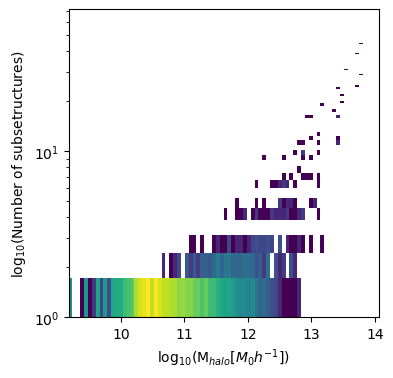

In [62]:
# Grafico con bines: 
fig, ax = plt.subplots(1,1, figsize=(4, 4))

X,Y = np.meshgrid(x,y)

hist2D = H.T/(xedges[1]-xedges[0])/(yedges[1]-yedges[0])

#cs = ax.imshow(H.T, origin="lower", cmap=cm.viridis, 
#               norm=colors.LogNorm(vmin=1),
#               extent=[xedges[0], xedges[-1], yedges[0],yedges[-1]], 
#               aspect='auto', interpolation='nearest') 

plt.pcolormesh(xedges, yedges, H.T, cmap=cm.viridis, norm=colors.LogNorm(vmin=1))
plt.yscale('log')

#plt.yscale('log'); #plt.xscale('log');#
ax.set_xlabel(r'log$_{10}$(M$_{halo}$[$M_{0}h^{-1}$])')
ax.set_ylabel(r"log$_{10}$(Number of subsetructures)")

Ahora como densidades e isocontornos

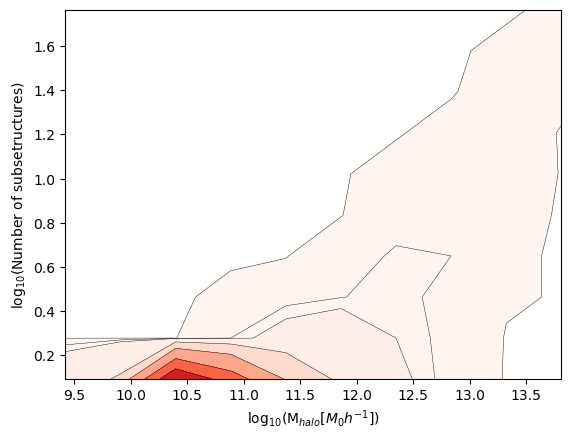

In [152]:
# Solo considera valores positivo
fig, ax = plt.subplots(1,1)

ejeX = datos[:,3]; ejeY = datos[:,2]
nz = (ejeX > 0) & (ejeY > 0) #& np.isfinite(ejeX) & np.isfinite(ejeY)
ejeX = ejeX[nz]; ejeY = ejeY[nz]

ContourLevels = np.array([0.0001, 0.005, 0.01, 0.095, 
                          0.25, 0.5, 0.75, 0.997])

H, xedges, yedges = np.histogram2d(np.log10(ejeX), #ejeY,
                                   np.log10(ejeY), 
                                   bins=10)
x = (xedges[1:]+xedges[:-1])/2
y = (yedges[1:]+yedges[:-1])/2

X,Y = np.meshgrid(x,y)
hist2D = H.T/(xedges[1]-xedges[0])/(yedges[1]-yedges[0])
   
ticks = ContourLevels*hist2D.max()

cs = ax.contourf(X, Y, hist2D, ticks, cmap=cm.Reds, zorder=1,
                 norm=colors.Normalize(vmin=0.001*hist2D.max(), 
                                       vmax=1.2*hist2D.max()))

cs = ax.contour(X, Y, hist2D, ticks, colors='k', 
                linewidths=0.3, zorder=1, 
                norm=colors.Normalize(vmin=0.1*hist2D.max(), 
                                      vmax=1.2*hist2D.max()))

ax.set_xlabel(r'log$_{10}$(M$_{halo}$[$M_{0}h^{-1}$])')
ax.set_ylabel(r'log$_{10}$(Number of subsetructures)')
#plt.yscale('log')

plt.show()

### Tarea 3: Gráfico de massa de los halos

In [15]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants as const

In [16]:
masa = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[3])
#plt.hist(np.log10(masa[:,3]))
masa

array([1.1418e+14, 6.1737e+12, 4.7089e+12, ..., 1.6560e+10, 1.6560e+10,
       5.4195e+10])

In [88]:
Mass = sussing_125.data[:,3]

#Histograma: 
n_bins         = 15; cte = 1000                 # Mpc/h ojo h=0.6777
counts, edges  = np.histogram(np.log10(Mass), 
                              bins=n_bins)

#phi:
def phi(D_n, edges, constante):
    width = edges[1]-edges[0]                   # Anchos constantes? 
    fi = (D_n/(width))/(constante**3)
    return fi

fi    = phi(counts, edges, cte)

[ 9.17765191  9.52621892  9.87478593 10.22335294 10.57191995 10.92048696
 11.26905397 11.61762098 11.96618798 12.31475499 12.663322   13.01188901
 13.36045602 13.70902303 14.05759004] [1.96723806e-07 3.10454756e-07 1.20493331e-06 8.02879032e-06
 7.86587842e-06 4.78592134e-06 2.60351662e-06 1.23874521e-06
 6.85459511e-07 3.56561898e-07 2.33609519e-07 8.91404745e-08
 4.30333325e-08 1.53690473e-08 1.22952379e-08]


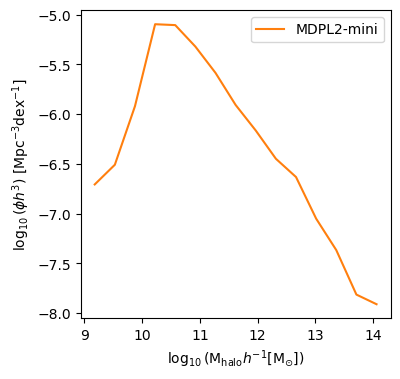

In [89]:
# Grafico con bines: 
fig, ax = plt.subplots(1,1, figsize=(4, 4))

exe_x = np.linspace(np.log10(min(Mass)), 
                    np.log10(max(Mass)), num=n_bins)

print(exe_x, fi)
#guardar los datos:
csv_data = np.column_stack((exe_x, np.log10(fi)))
np.savetxt('out_data/datos_masa_mini.csv', csv_data, delimiter=',', header='exe_x,log10(fi)', comments='')

ax.plot(exe_x,np.log10(fi), color='C1', label="MDPL2-mini")

ax.set_xlabel(r'$\log_{10}$(M$_{\mathrm{halo}}h^{-1}$[$\mathrm{M}_{\odot}$])')
ax.set_ylabel(r'$\log_{10}(\phi h^{3})$ [Mpc$^{-3}$dex$^{-1}$]')
plt.legend()

Cambio de forma de lectura de archivos, porque numpy ocupa mucha memoria

In [19]:
class read_file2: 
    
    def __init__(self, path, file, columns=None):
        if columns is not None:
            self.cols = columns
        else:
            #self.cols     = [0, 1, 2, 3, 5, 6, 7]        #ID, hosthalo, substruc, masa y posiciones xyz
            self.cols      = [1, 2, 3]                    #solo N. de sub y masa para el plot 2D.
        self.path = path; self.file = file; 
        self.read()

    def read(self):
        data = []
        if self.file == "*.hdf5":
            print("No se ha hecho esta parte")
        else:
            with open(self.path + self.file, 'r') as file:
                for line in file:
                    split_line = line.split()  # Asumiendo que los datos están separados por espacios
                    try:
                        # Seleccionar solo las columnas deseadas y convertirlas a float
                        selected_data = [float(split_line[i]) for i in self.cols]
                        data.append(selected_data)
                    except (ValueError, IndexError):
                        # Manejar posibles errores de conversión o índices incorrectos
                        continue
        self.data = np.array(data)

        #return np.array(self.data)
                
    def halo_info(self, index, info=False): 
        self.hinfo = self.data[index]
        return(self.hinfo)


class kinetic:                                   
    
    def __init__(self, halo1, halo2):                       #halo1 y halo22 son objetos de read_file (halo_info)  
        self.halo1 = halo1; self.halo2 = halo2     

    def distance(self): 
        posA = self.halo1[4:]; posB = self.halo2[4:]
        return(np.linalg.norm(posA-posB))


In [20]:
datos = read_file2("DATA/", "sussing_125.z0.000.AHF_halos")

In [107]:
datos.data[:,2]

TypeError: memoryview: invalid slice key

### Tarea 3: massa de halos en la MDPL2-mini y la MDPL2

In [93]:
M_MPDL2_mini = np.genfromtxt("out_data/datos_masa_mini.csv", delimiter=',', skip_header=1)
M_MPDL2_big  = np.genfromtxt("out_data/datos_masa.csv", delimiter=',', skip_header=1)

In [95]:
M_MPDL2_big[:,0]

array([ 9.17765191,  9.62441677, 10.07118162, 10.51794648, 10.96471133,
       11.41147619, 11.85824105, 12.3050059 , 12.75177076, 13.19853561,
       13.64530047, 14.09206532, 14.53883018, 14.98559503, 15.43235989])

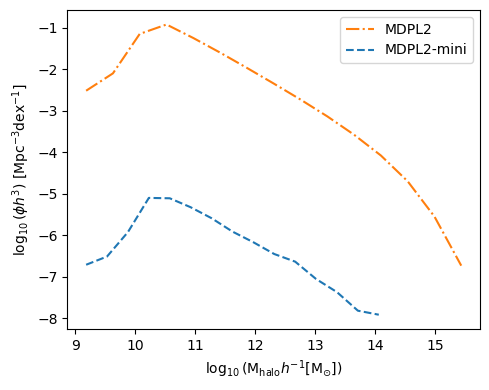

In [105]:
# Grafico con bines: 
fig, ax = plt.subplots(1,1, figsize=(5, 4))

ax.plot(M_MPDL2_big[:,0], M_MPDL2_big[:,1], 
        color='C1', ls='-.', label="MDPL2")

ax.plot(M_MPDL2_mini[:,0], M_MPDL2_mini[:,1], 
        color='C0', ls='--', label="MDPL2-mini")

ax.set_xlabel(r'$\log_{10}$(M$_{\mathrm{halo}}h^{-1}$[$\mathrm{M}_{\odot}$])')
ax.set_ylabel(r'$\log_{10}(\phi h^{3})$ [Mpc$^{-3}$dex$^{-1}$]')
plt.legend()
plt.tight_layout(); plt.savefig("plot/Masas_fi.pdf")